In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


##  Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # make sure xgboost is installed

from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# datasettt.
data=pd.read_csv('Air_Quality.csv')
data.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999


In [10]:
# Check missing values
data.isnull().sum()




Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [11]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


## Data Preprocessing

In [12]:
# Convert Date column to datetime
# data['Date'] = pd.to_datetime(data['Date'])
data.drop(columns=['Date','City'],inplace=True)

# Encode 'City' column into numbers
# le = LabelEncoder()
# data['City'] = le.fit_transform(data['City'])

# Drop rows with missing values
data = data.dropna()


## Data Visualization

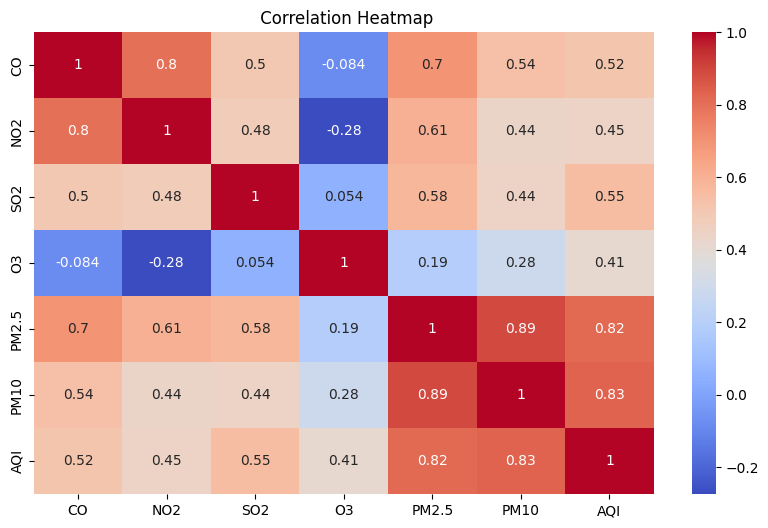

In [13]:
# 1. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap")
plt.show()


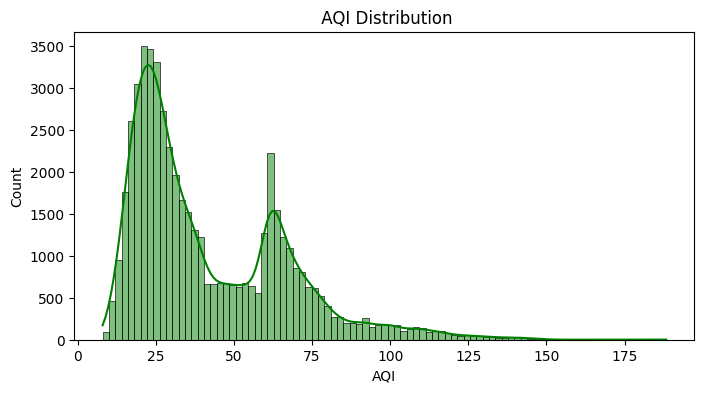

In [14]:
# 2. AQI Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['AQI'], kde=True, color='green')
plt.title(" AQI Distribution")
plt.show()

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filter the DataFrame
df_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

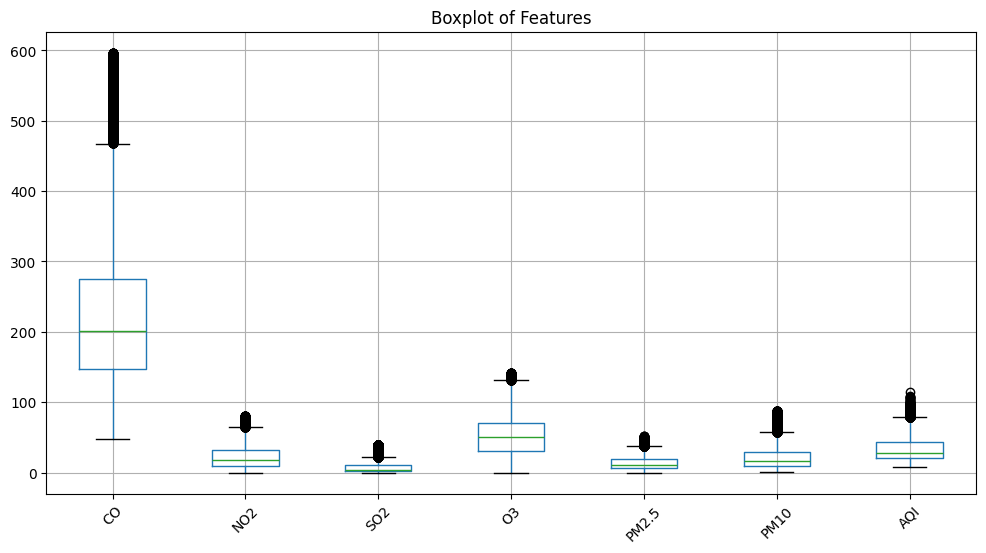

In [16]:
# 3. Boxplot for Outliers
plt.figure(figsize=(12, 6))
df_clean.boxplot()
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [17]:
X = df_clean.drop('AQI', axis=1)  # Features
y = df_clean['AQI']   

In [18]:
# Standardize (scale) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


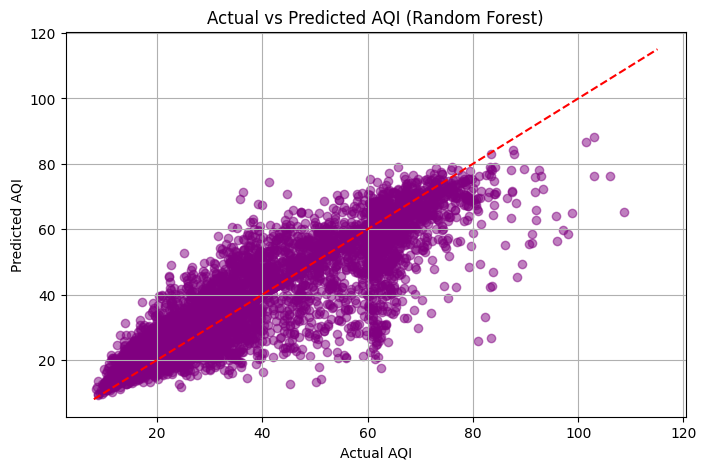

In [20]:
# Use Random Forest as an example (or use your best model)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, best_pred, alpha=0.5, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Random Forest)")
plt.grid(True)
plt.show()               


C:\Users\rajas\AppData\Local\Temp\ipykernel_10304\2504844513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='mako')


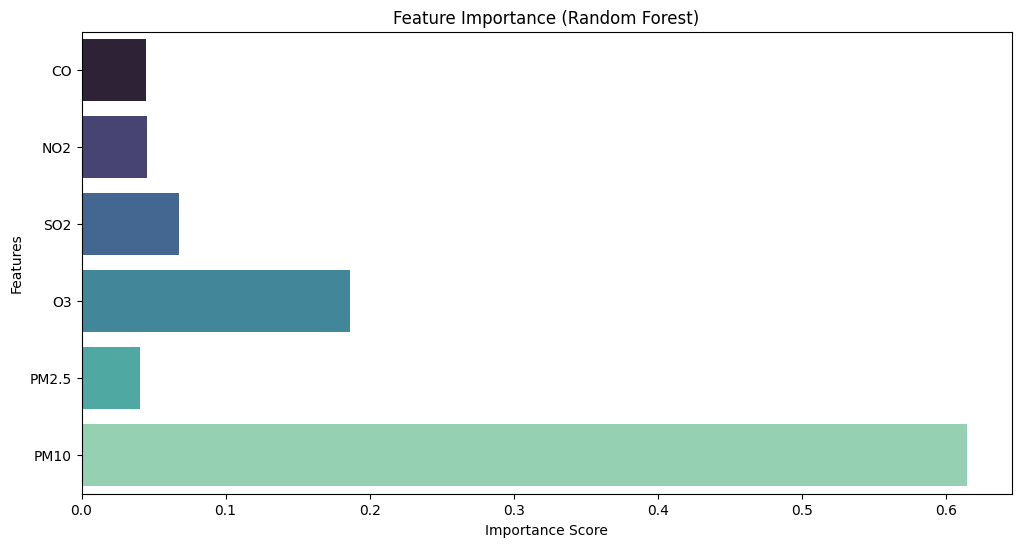

In [22]:

# If you used scaled features like X_scaled, you need to get feature names from original X
# This is because X_scaled is a NumPy array and has no columns
features = [ 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']  # replace this if needed

# Ensure the model supports feature importance
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_

    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances, y=features, palette='mako')
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()
else:
    print("⚠️ The selected model does not support feature importances.")


In [24]:
# Dictionary to hold all models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [25]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict output

    # Calculate error and accuracy
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save results
    results[name] = {"MSE": mse, "R2": r2}

    # Print result
    print(f"📘 {name}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)


📘 Linear Regression
  Mean Squared Error: 81.76
  R² Score: 0.7246
----------------------------------------
📘 Decision Tree
  Mean Squared Error: 106.82
  R² Score: 0.6402
----------------------------------------
📘 Random Forest
  Mean Squared Error: 54.83
  R² Score: 0.8153
----------------------------------------
📘 K-Nearest Neighbors
  Mean Squared Error: 56.99
  R² Score: 0.8080
----------------------------------------
📘 Support Vector Regressor
  Mean Squared Error: 69.49
  R² Score: 0.7659
----------------------------------------
📘 Gradient Boosting
  Mean Squared Error: 64.98
  R² Score: 0.7811
----------------------------------------
📘 XGBoost
  Mean Squared Error: 59.45
  R² Score: 0.7997
----------------------------------------


In [26]:
import pickle

# Save the XGBoost model to a pickle file
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(models['XGBoost'], f)

In [27]:
import pickle

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [28]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

C:\Users\rajas\AppData\Local\Temp\ipykernel_23316\581812033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df, palette='crest')


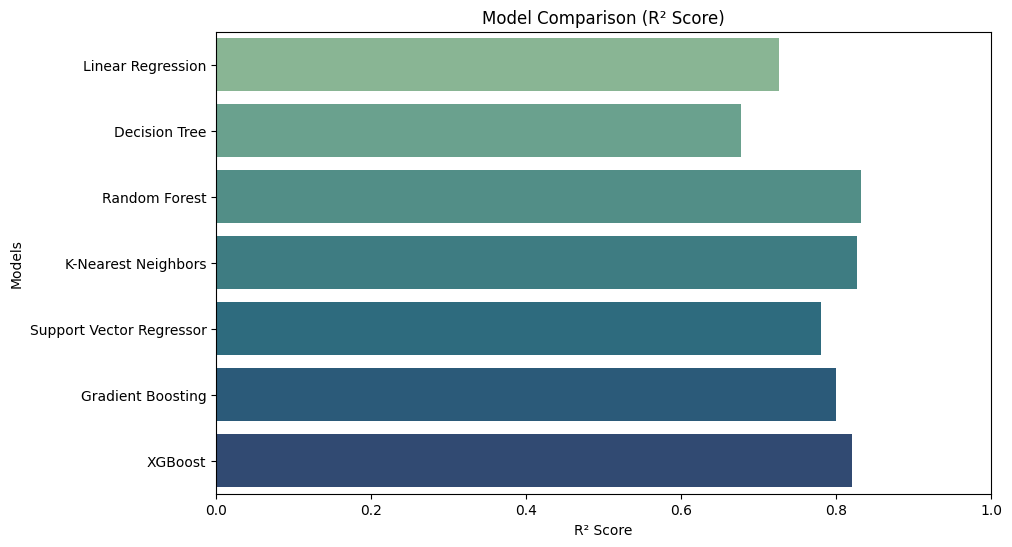

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ['Model', 'MSE', 'R2']

# Plot R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results_df, palette='crest')
plt.title("Model Comparison (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Models")
plt.xlim(0, 1)
plt.show()
